# EDA and Cleaning

## Import data and clean it up. 

1. resize everything to have the maximum height or width (depending on which one was larger over all of the data)
2. Make histograms of original size distribution
3. Add padding to make everything same size
4. Convert all images to greyscale

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
image_path = 'PATH'

In [10]:
def make_histograms(list1, list2, label1='heights', label2='widths'):
    # Set up the figure and axes
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))

    bin_num=3000
    # Plot the data
    axes[0].hist(list1, bins=bin_num, edgecolor="k", alpha=0.7)
    axes[1].set_title(f"Histogram of {label1}")
    axes[0].set_xlabel("Pixels")
    axes[0].set_ylabel("Frequency")

    axes[1].hist(list2, bins=bin_num, edgecolor="k", alpha=0.7)
    axes[1].set_title(f"Histogram of {label2}")
    axes[1].set_xlabel("Pixels")
    axes[1].set_ylabel("Frequency")

    # Adjust the layout
    plt.tight_layout()
    plt.show()
    

def get_lists_h_w(image_path):
    heights = []
    widths = []
    for root, dirs, files in os.walk(image_path):
        for file in files:
            if file.endswith('.png'):
                image = cv2.imread(os.path.join(root, file))
                heights.append(image.shape[0])
                widths.append(image.shape[1])
    return heights, widths



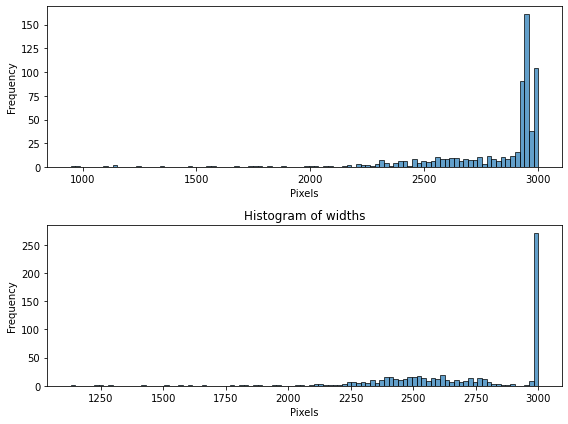

In [5]:
# max_height, max_width = get_max_h_w(image_path)
heights, widths = get_lists_h_w(image_path)
max_height = max(heights)
max_width = max(widths)

make_histograms(heights, widths)

In [6]:
import gc

# check to see if width or height is larger and what we are resizing based on 
resize_based_on_width = True if max_width > max_height else False

processed_image_path = 'clean_images'

# store scaled images in a dictionary using file path as key. Not very efficient but works well enough with memory management 
scaled_images_dict = {}

# resize based on aspect ratio
for root, dirs, files in os.walk(image_path):
    for file in files:
        if file.endswith('.png'):
            image = cv2.imread(os.path.join(root, file))
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
            
            if resize_based_on_width:
                new_height = int((max_width / image.shape[1]) * image.shape[0])
                image = cv2.resize(image, (max_width, new_height))
            else:
                new_width = int((max_height / image.shape[0]) * image.shape[1])
                image = cv2.resize(image, (new_width, max_height))

            # update the max_width and max_height in case it changes after resize
            max_width = max(max_width, image.shape[1])
            max_height = max(max_height, image.shape[0])
            
            scaled_images_dict[file] = image


In [7]:
#  add padding based on the max_width and max_height after resizing
for file, image in scaled_images_dict.items():
    top_padding = (max_height - image.shape[0]) // 2
    bottom_padding = max_height - image.shape[0] - top_padding
    left_padding = (max_width - image.shape[1]) // 2
    right_padding = max_width - image.shape[1] - left_padding
    print(f"Processing {file}")
    print(f"Image dimensions: {image.shape[1]}x{image.shape[0]}")
    print(f"Max dimensions: {max_width}x{max_height}")
    print(f"Padding - Top: {top_padding}, Bottom: {bottom_padding}, Left: {left_padding}, Right: {right_padding}")
    
    padded_image = cv2.copyMakeBorder(image, top_padding, bottom_padding, left_padding, right_padding, cv2.BORDER_CONSTANT, value=[0, 0, 0])
    cv2.imwrite(os.path.join(processed_image_path, file), padded_image)

    # manage memory 
    del image, padded_image
    gc.collect()


Processing CHNCXR_0492_1.png
Image dimensions: 2750x3001
Max dimensions: 3892x3001
Padding - Top: 0, Bottom: 0, Left: 571, Right: 571
Processing CHNCXR_0187_0.png
Image dimensions: 2387x3001
Max dimensions: 3892x3001
Padding - Top: 0, Bottom: 0, Left: 752, Right: 753
Processing CHNCXR_0342_1.png
Image dimensions: 2826x3001
Max dimensions: 3892x3001
Padding - Top: 0, Bottom: 0, Left: 533, Right: 533
Processing CHNCXR_0286_0.png
Image dimensions: 3047x3001
Max dimensions: 3892x3001
Padding - Top: 0, Bottom: 0, Left: 422, Right: 423
Processing CHNCXR_0022_0.png
Image dimensions: 3050x3001
Max dimensions: 3892x3001
Padding - Top: 0, Bottom: 0, Left: 421, Right: 421
Processing CHNCXR_0067_0.png
Image dimensions: 3057x3001
Max dimensions: 3892x3001
Padding - Top: 0, Bottom: 0, Left: 417, Right: 418
Processing CHNCXR_0572_1.png
Image dimensions: 3146x3001
Max dimensions: 3892x3001
Padding - Top: 0, Bottom: 0, Left: 373, Right: 373
Processing CHNCXR_0537_1.png
Image dimensions: 2754x3001
Max d

In [12]:
unique_shapes = set()

for root, dirs, files in os.walk(processed_image_path):
    for file in files:
        if file.endswith('.png'):
            image_path = os.path.join(root, file)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            unique_shapes.add(image.shape)

print(f"Unique shapes found: {unique_shapes}")

Unique shapes found: {(3001, 3892)}
